### Importações

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

from Adaline import Adaline

## Gerar Amostras

### Amostra Aleatória

In [2]:
n = 100
t = np.linspace(0, 10, n)

x1 = 50 * np.sin(t)
x2 = 10*t - 8
x3 = t**2 +  2*t -12

X = np.array([x1, x2, x3]).T
Y = np.array([2*x1 + 2*x2 - 2*x3]).T

## Visualizar Amostra

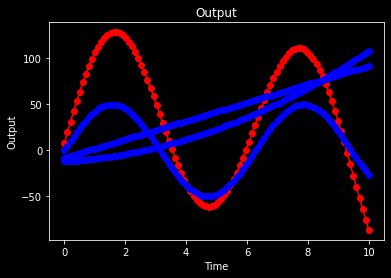

In [3]:

# Saida    
plt.plot(t, Y, '-or')

# Entradas
inputsCount = np.size(X, 1)

for i in range(0, inputsCount):
    
    plt.plot(t, X[:, i], '-ob')
    
    plt.title('Input ' + str(i + 1))
    plt.xlabel('Time')
    plt.ylabel('Input')

# Config
plt.rcParams["figure.figsize"] = [10, 5]
plt.title('Output')
plt.xlabel('Time')
plt.ylabel('Output')

# plt.savefig('graph-' + str(exQuestionNumber) + '-output.png')
plt.show()

## Separar Amostras: Teste X Treinamento

In [4]:
# Dividir amostra (parte para treino + parte para teste)
testFraction = .3

sampleSize = X.shape[0]
testSize = math.ceil(testFraction * sampleSize)

testIdxs = np.sort(random.sample(range(0, sampleSize), testSize)).astype(int)

prev = -1
trainingIdxs = np.array([], dtype=int)

for testIdx in testIdxs:
  idxToAppend = list(range(prev + 1, testIdx))
  trainingIdxs = np.append(trainingIdxs, idxToAppend)
  prev = testIdx

idxToAppend = list(range(prev + 1, sampleSize))
trainingIdxs = np.append(trainingIdxs, idxToAppend).astype(int)

# Separacao entre dados de trainamento / Dados de teste
trainingT = t[trainingIdxs]
trainingX = X[trainingIdxs]
trainingY = Y[trainingIdxs]

testT = t[testIdxs]
testX = X[testIdxs]
testY = Y[testIdxs]

## Treinar

In [5]:
# Parameters
step = 0.05
tolerance = 0.0001
maxIterations = 100

adaline = Adaline(trainingX, trainingY, tolerance, step, maxIterations)
w = adaline.train()

## Visualizar Resultado

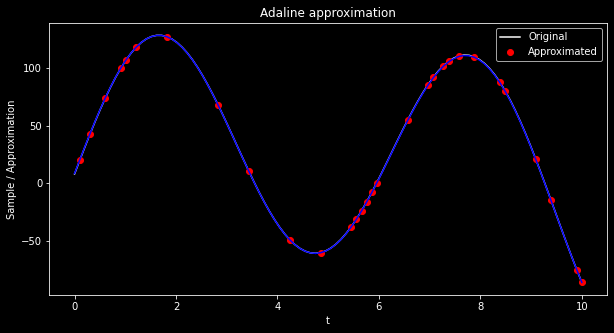

In [6]:


yApprox = np.array([])
for xLine in X:
  yApprox = np.append(yApprox, adaline.getApproximation(xLine))

plt.plot(t, Y, '-w')
plt.plot(testT, testY, 'or')
plt.plot(t, yApprox, '-b')

plt.rcParams["figure.figsize"] = [15, 8]
plt.xlabel('t')
plt.ylabel('Sample / Approximation')

plt.title('Adaline approximation')
plt.legend(['Original', 'Approximated'])

plt.show()

### Visualizar evolução

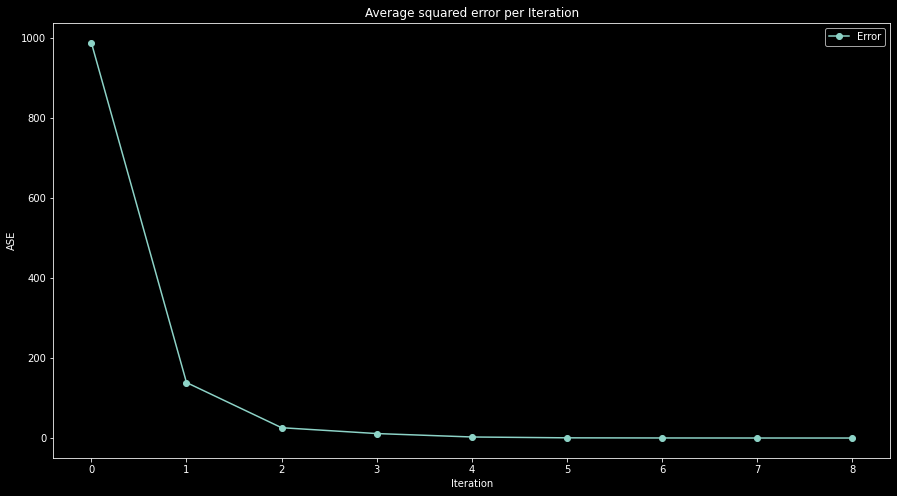

In [7]:

plt.plot(adaline.getErrorHistory(), '-o')

plt.xlabel('Iteration')
plt.ylabel('ASE')
plt.title('Average squared error per Iteration')
plt.legend(['Error'])

# plt.savefig('graph-' + str(exQuestionNumber) + '-error-history-s' + stepStr + '-t' + toleranceStr + '.png')
plt.show()